In [1]:
import sys
from PyQt5.QtWidgets import QApplication
from kiwoom_api.api import Kiwoom, DataFeeder, Executor

In [2]:
app = QApplication(sys.argv)

kiwoom = Kiwoom() # Kiwoom 인스턴스 생성
kiwoom.commConnect() # API 접속
feeder = DataFeeder(kiwoom)

2020-06-11 16:22:26.050813 Connection Successful


In [3]:
import pandas as pd

In [ ]:
kiwoom.dynamicCall('GetMasterCodeName("{}")'.format(market))

In [5]:
tmp = kiwoom.codes

In [6]:
tmp

['000020',
 '000040',
 '000050',
 '000060',
 '000070',
 '000075',
 '000080',
 '000087',
 '000100',
 '000105',
 '000120',
 '000140',
 '000145',
 '000150',
 '000155',
 '000157',
 '000180',
 '000210',
 '000215',
 '000220',
 '000225',
 '000227',
 '000230',
 '000240',
 '000270',
 '000300',
 '000320',
 '000325',
 '000370',
 '000390',
 '000400',
 '000430',
 '000480',
 '000490',
 '000500',
 '000520',
 '000540',
 '000545',
 '000547',
 '000590',
 '000640',
 '000650',
 '000660',
 '000670',
 '000680',
 '000700',
 '000720',
 '000725',
 '000760',
 '000810',
 '000815',
 '000850',
 '000860',
 '000880',
 '000885',
 '00088K',
 '000890',
 '000910',
 '000950',
 '000970',
 '000990',
 '000995',
 '001020',
 '001040',
 '001045',
 '00104K',
 '001060',
 '001065',
 '001067',
 '001070',
 '001080',
 '001120',
 '001130',
 '001140',
 '001200',
 '001210',
 '001230',
 '001250',
 '001260',
 '001270',
 '001275',
 '001290',
 '001340',
 '001360',
 '001380',
 '001390',
 '001420',
 '001430',
 '001440',
 '001450',
 '001460',

In [4]:
code = "005930" # 삼성전자

# TR요청(request)에 필요한 parameter는 KOAStudio를 참고하시길 바랍니다.
# OPT10004: 주식호가요청
params = {"종목코드": code, "기준일자": "20200602", "수정주가구분" : "1"}
data = feeder.request(trCode="OPT10081", **params)

2020-06-10 16:25:49.154906  commRqData 주식일봉차트조회요청
{'BASC_DT': '2020-06-10',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식일봉차트조회요청',
 'TIME': '2020-06-10 16:25:59.660811',
 'TR_CODE': 'OPT10081'}


In [5]:
mul_data = data['멀티데이터']

In [6]:
df_data = pd.DataFrame(mul_data)

In [7]:
df_data[df_data['수정비율'] != '']

,종목코드,현재가,거래량,거래대금,일자,체결시간,시가,고가,저가,수정주가구분,수정비율,대업종구분,소업종구분,종목정보,수정주가이벤트,전일종가
42,,47850,26797395,1268119,20200330,,47050,48350,46550,4,0.00,,,,,
104,,56500,12313056,692415,20191227,,55700,56900,55500,4,0.00,,,,,
166,,48400,8048041,389082,20190927,,48000,48700,48000,4,0.00,,,,,
229,,46500,12603534,583889,20190627,,46000,46600,45750,4,0.00,,,,,
291,,44850,6821306,306038,20190328,,44950,45200,44300,4,0.00,,,,,
350,,38250,10510643,403521,20181227,,38700,38800,38100,4,0.00,,,,,
412,,47500,15804586,742801,20180927,,46950,47500,46450,4,0.00,,,,,
473,,46800,12784800,598306,20180628,,46850,47150,46600,4,0.00,,,,,
508,,51900,39565391,2078018,20180504,,53000,53900,51800,8,-98.00,,,,,
533,,49040,10067000,492355,20180329,,48700,49560,48320,4,-98.00,,,,,


In [8]:
cols = [ '일자','현재가', '시가', '고가', '저가', '거래량', '거래대금']

In [9]:
df_data = df_data[cols]

In [10]:
df_data['일자'] = pd.to_datetime(df_data['일자'])

In [11]:
df_data.iloc[:, 1:] = df_data.iloc[:, 1:].astype(int)

In [12]:
df_data

,일자,현재가,시가,고가,저가,거래량,거래대금
0,2020-06-02,51400,51000,51500,50800,14247933,730124
1,2020-06-01,51200,50800,51200,50600,16949183,864647
2,2020-05-29,50700,50000,50700,49700,27596961,1390446
3,2020-05-28,50400,51100,51200,49900,31309318,1585346
4,2020-05-27,49900,48950,50000,48800,19548479,969952
...,...,...,...,...,...,...,...
595,2017-12-26,48200,49760,50100,48200,16039850,787685
596,2017-12-22,49700,49400,49960,49240,11199650,555690
597,2017-12-21,49140,51000,51060,49100,15624300,777079
598,2017-12-20,50880,51500,51760,50820,10080550,515676


In [13]:
df_data.to_csv('삼성전자주가_20200602_20171219')

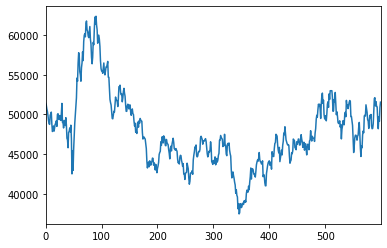

In [15]:
df_data['현재가'].astype(int).plot()

In [22]:
params = {"종목코드": code, "기준일자": "20171219", "수정주가구분" : "1"}
data2 = feeder.request(trCode="OPT10081", **params)

2020-06-02 16:18:05.277200  commRqData 주식일봉차트조회요청
{'BASC_DT': '2020-06-02',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식일봉차트조회요청',
 'TIME': '2020-06-02 16:18:05.719462',
 'TR_CODE': 'OPT10081'}


In [23]:
mul_data2 = data2['멀티데이터']
df_data2 = pd.DataFrame(mul_data2)

In [24]:
df_data2[df_data2['수정주가구분'] != '']

,종목코드,현재가,거래량,거래대금,일자,체결시간,시가,고가,저가,수정주가구분,수정비율,대업종구분,소업종구분,종목정보,수정주가이벤트,전일종가
116,,2397000,166131,399659,20170629,,2402000,2416000,2397000,4,0.00,,,,,
176,,2099000,164080,344971,20170330,,2094000,2122000,2094000,4,0.00,,,,,
363,,1396000,210541,295399,20160629,,1408000,1412000,1391000,4,0.00,,,,,


In [25]:
mul_data2 = data2['멀티데이터']
df_data2 = pd.DataFrame(mul_data2)
df_data2 = df_data2[cols]

In [26]:
df_data2 = df_data2.astype(int)

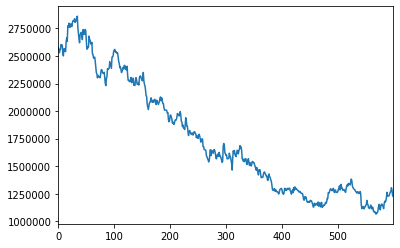

In [27]:
df_data2['현재가'].plot()

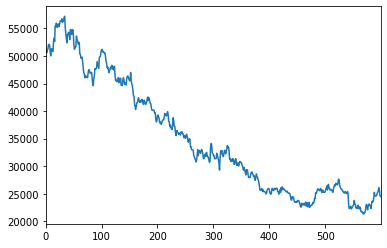

In [31]:
(df_data2['현재가']/100*2).plot()

In [40]:
df_data2['현재가'][:5]/100*2

0    51560.0
1    51200.0
2    50620.0
3    51060.0
4    51320.0
Name: 현재가, dtype: float64

In [37]:
df_data['현재가'].astype(int)[-5:]

595    48200
596    49700
597    49140
598    50880
599    51560
Name: 현재가, dtype: int32